In [1]:
# Imports
import glob
import pandas as pd
import re
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [36]:
# Global Variables
data_path = '../data/raw/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

In [41]:
energy_profiles_df = build_dataframe(get_all_csv_filenames(data_path))
energy_profiles_df.info()
display(energy_profiles_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280320 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 10

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8756,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8757,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8758,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [42]:
energy_profiles_df.rename(columns={'Electricity:Facility [kW](Hourly)': 'Electric_Facility', 'Gas:Facility [kW](Hourly)': 'Gas_Facility'}, inplace=True)

energy_profiles_df

,Date/Time,Electric_Facility,Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas_Facility,Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8756,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8757,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8758,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [43]:
energy_profiles_df.reset_index(drop=True, inplace=True)
energy_profiles_df

,Date/Time,Electric_Facility,Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas_Facility,Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [5]:
profiles_df = energy_profiles_df.drop(columns=['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)','Heating:Electricity [kW](Hourly)'
                                              ,'InteriorLights:Electricity [kW](Hourly)','InteriorEquipment:Electricity [kW](Hourly)'
                                              ,'Heating:Gas [kW](Hourly)','InteriorEquipment:Gas [kW](Hourly)','Water Heater:WaterSystems:Gas [kW](Hourly)'
                                              ,'Electricity:Facility [kW](Monthly)','Gas:Facility [kW](Monthly)'])

profiles_df

,Date/Time,Electric_Facility,Gas_Facility,building_type,location
0,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA
...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,60.633698,Warehouse,IL_CHICAGO-OHARE
8756,12/31 21:00:00,19.655896,82.036381,Warehouse,IL_CHICAGO-OHARE
8757,12/31 22:00:00,19.063661,70.727347,Warehouse,IL_CHICAGO-OHARE
8758,12/31 23:00:00,20.442228,98.965980,Warehouse,IL_CHICAGO-OHARE


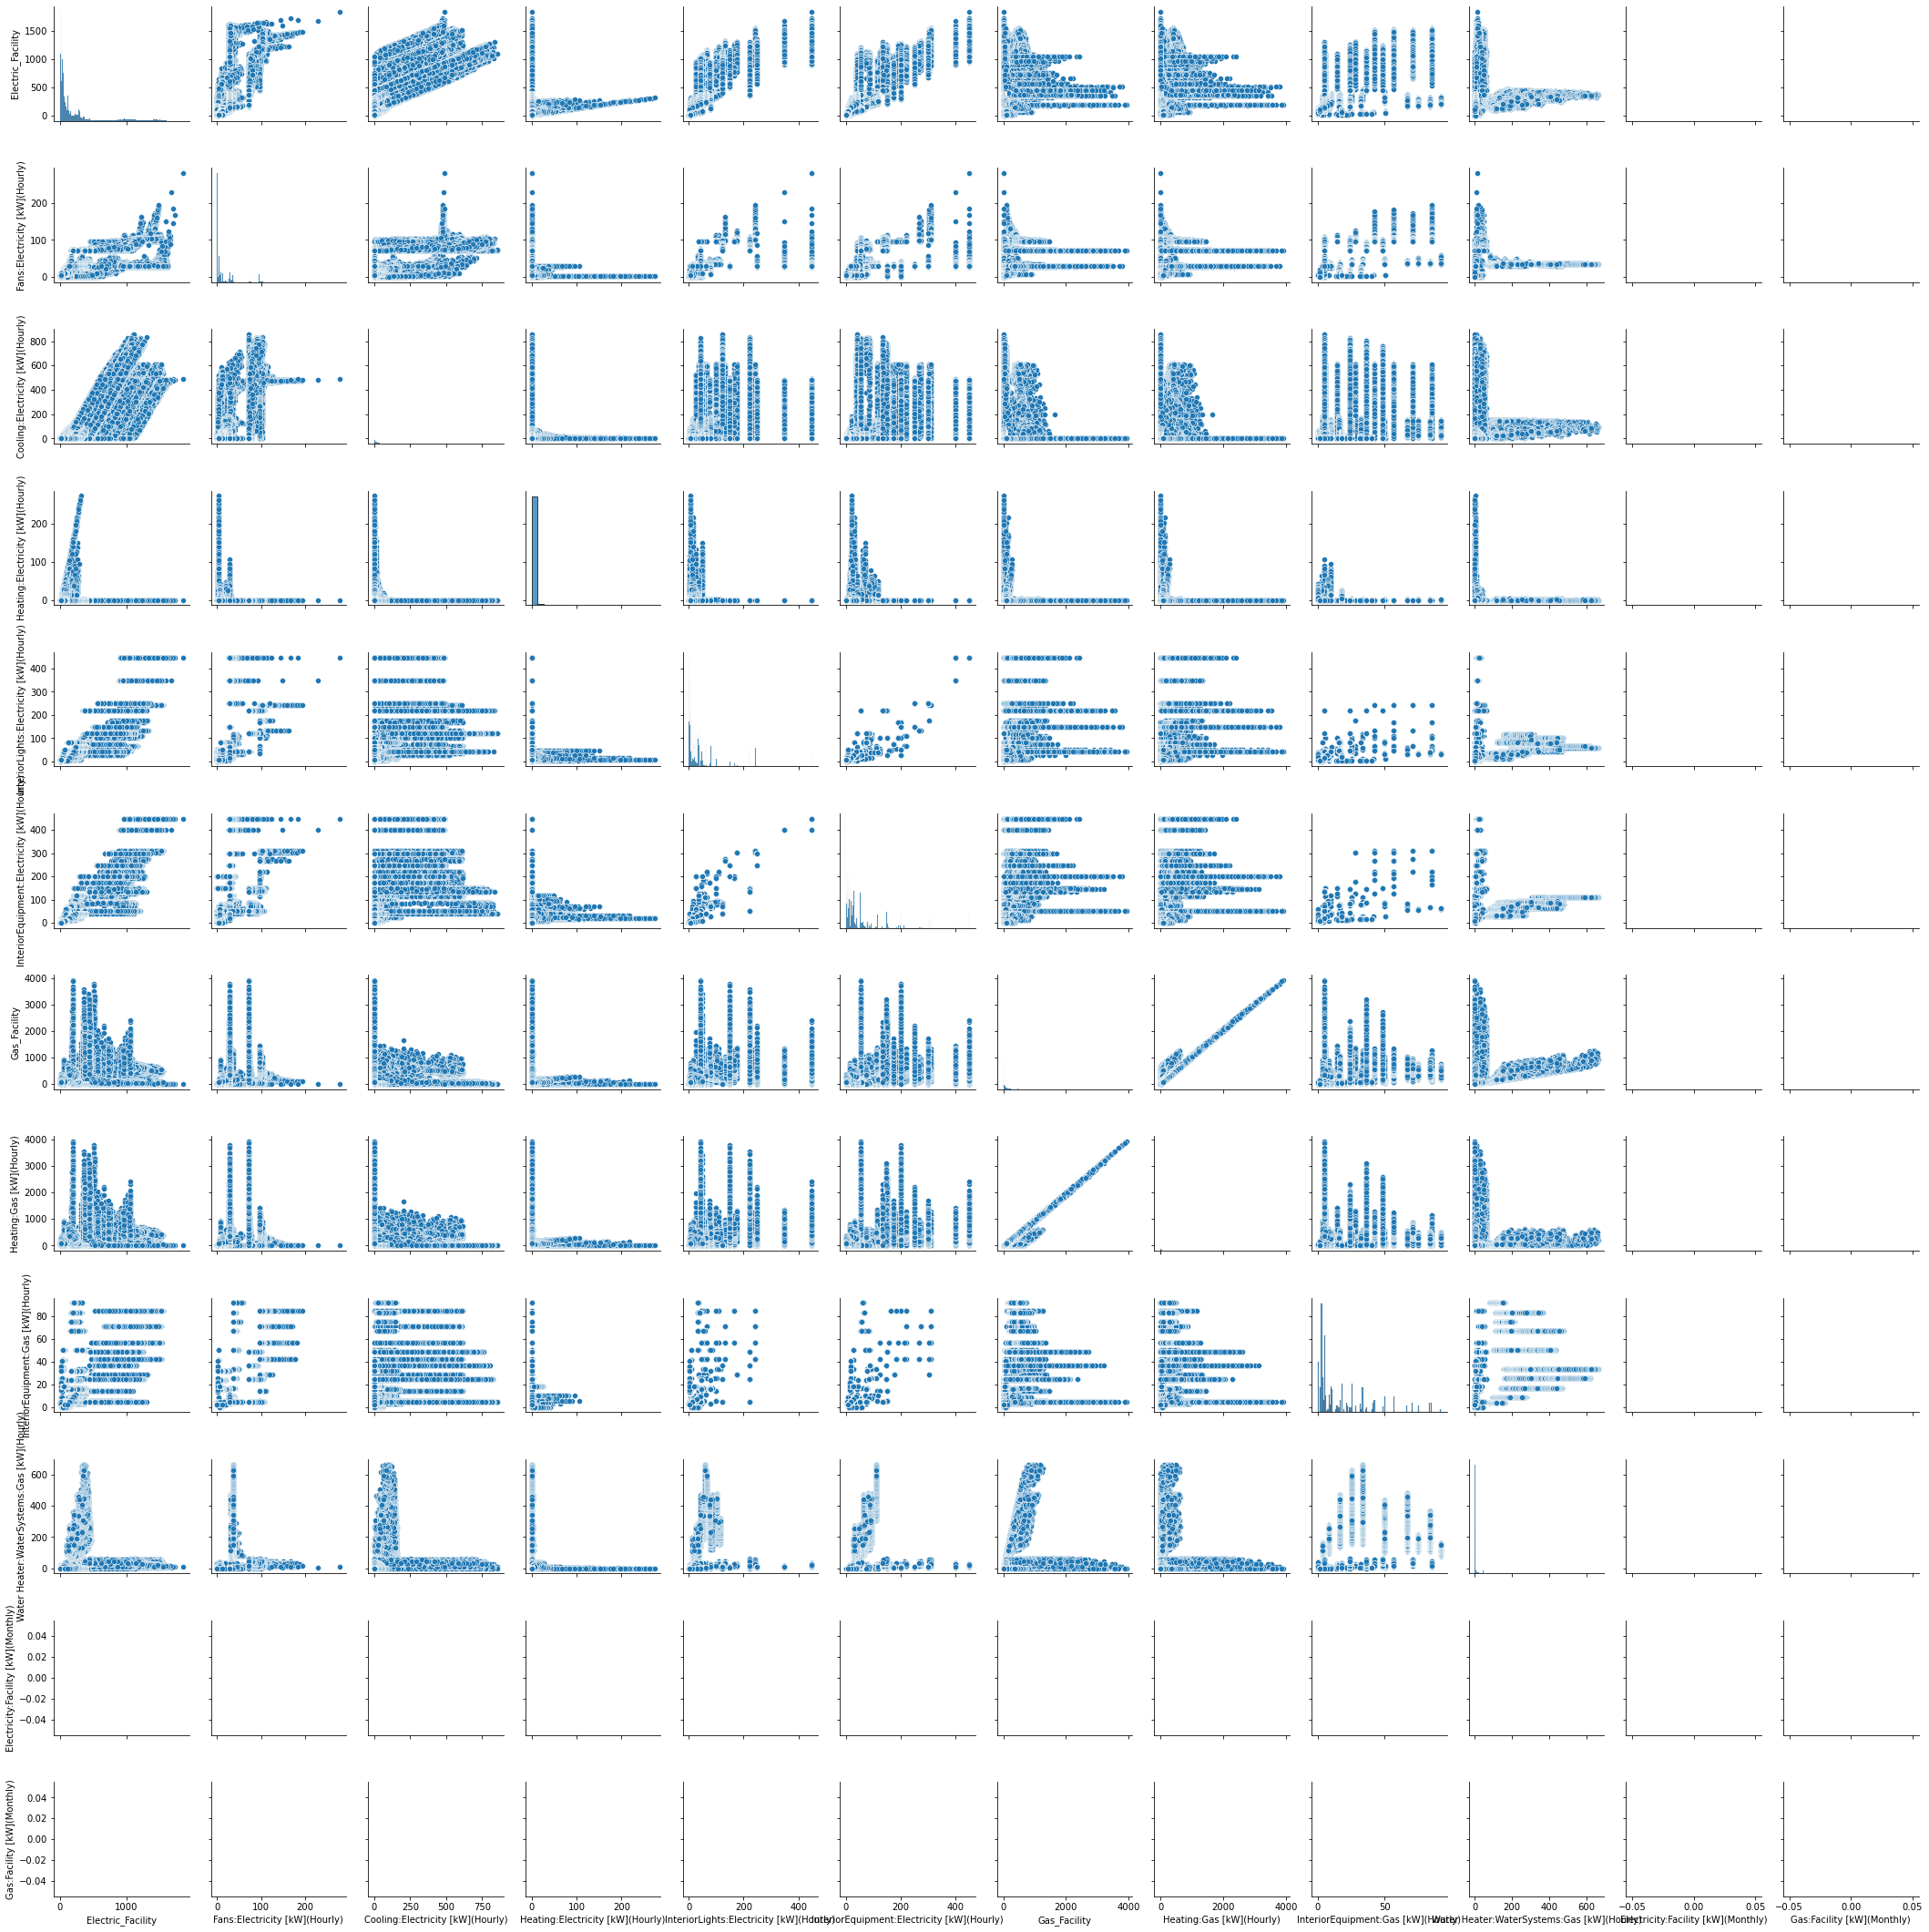

In [6]:
sns.pairplot(energy_profiles_df)
plt.show()

<AxesSubplot:>

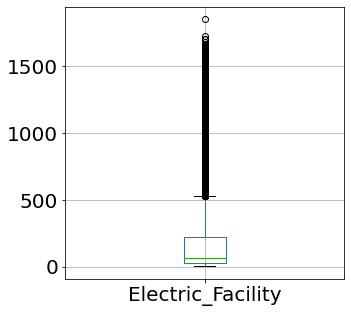

In [7]:
profiles_df.boxplot('Electric_Facility', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

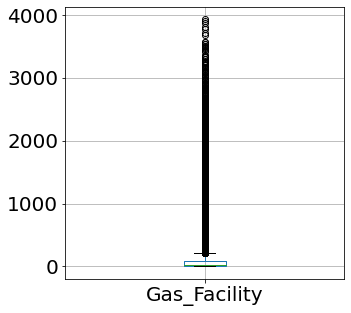

In [8]:
profiles_df.boxplot('Gas_Facility', figsize=(5,5), fontsize= 20)

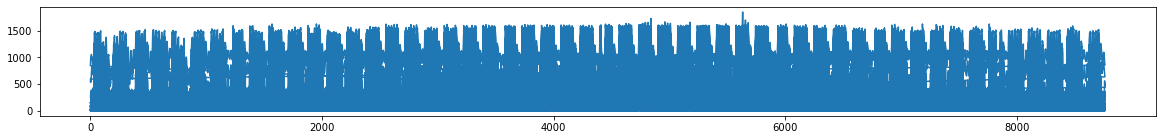

In [9]:
profiles_df.Electric_Facility.plot(figsize=(20,2));


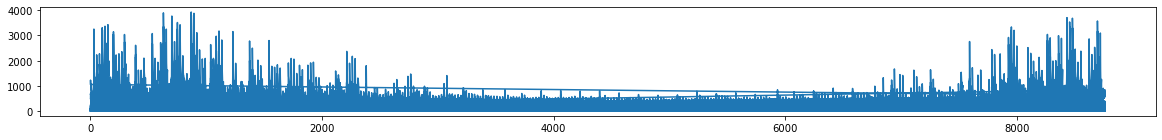

In [10]:
profiles_df.Gas_Facility.plot(figsize=(20,2));

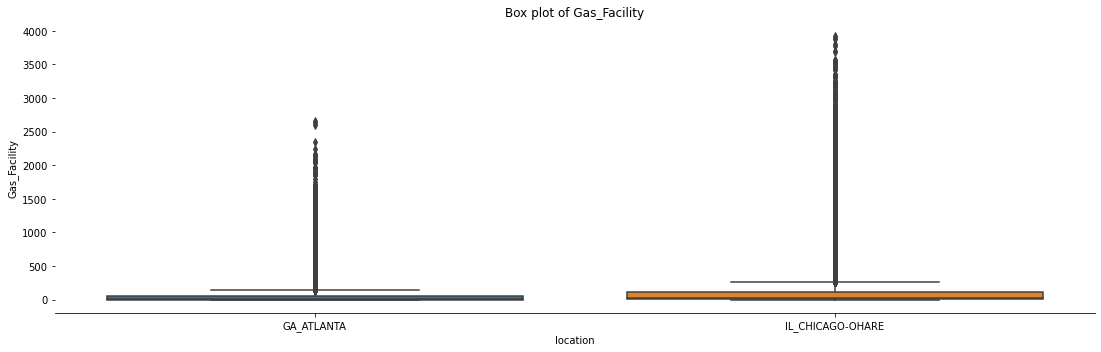

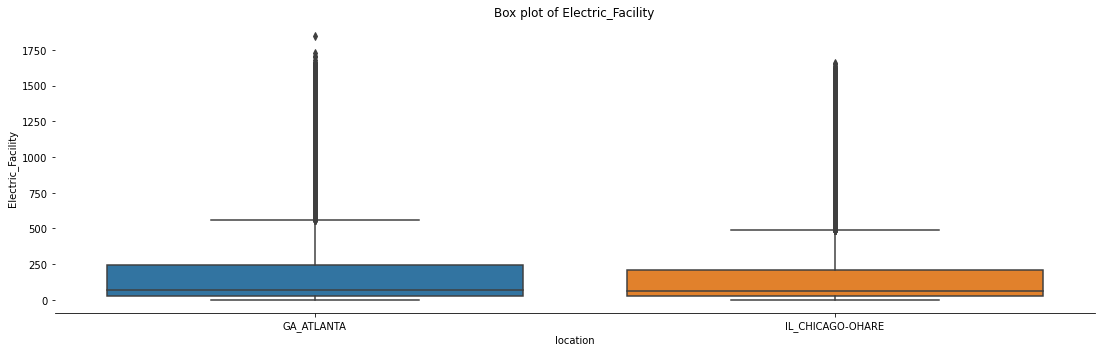

In [11]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='location', y='Gas_Facility', data=profiles_df)
plt.xlabel('location')
plt.title('Box plot of Gas_Facility')
sns.despine(left=True)
plt.tight_layout()



#Box Plot of Electricity:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x="location", y="Electric_Facility", data=profiles_df)
plt.xlabel('location')
plt.title('Box plot of Electric_Facility')
sns.despine(left=True)
plt.tight_layout()

Looks like  in consumption of gas, chicago has the higher percentage use while in Electricity, Atlanta use more

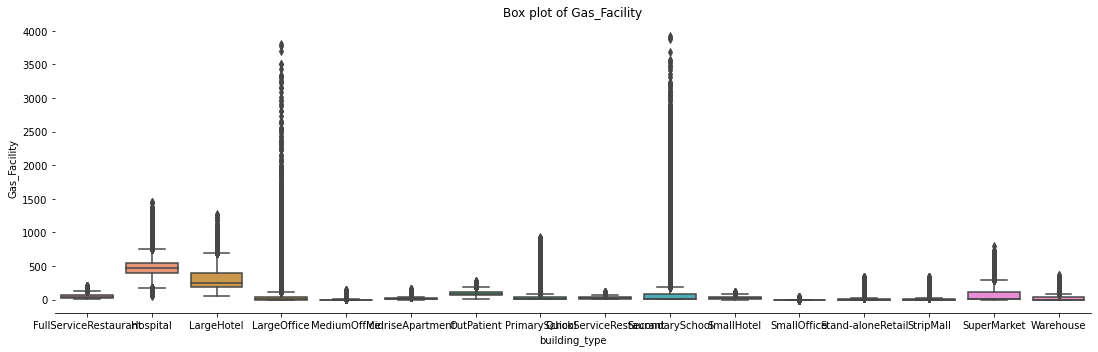

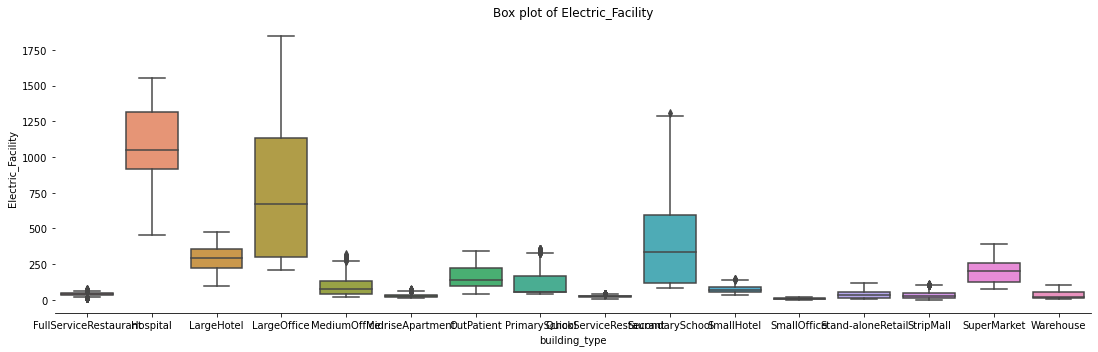

In [12]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='building_type', y='Gas_Facility', data=profiles_df)
plt.xlabel('building_type')
plt.title('Box plot of Gas_Facility')
sns.despine(left=True)
plt.tight_layout()



#Box Plot of Electricity:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x="building_type", y="Electric_Facility", data=profiles_df)
plt.xlabel('building_type')
plt.title('Box plot of Electric_Facility')
sns.despine(left=True)
plt.tight_layout()

Text(0.5, 1.0, 'Mean Electric_Facility by building_type')

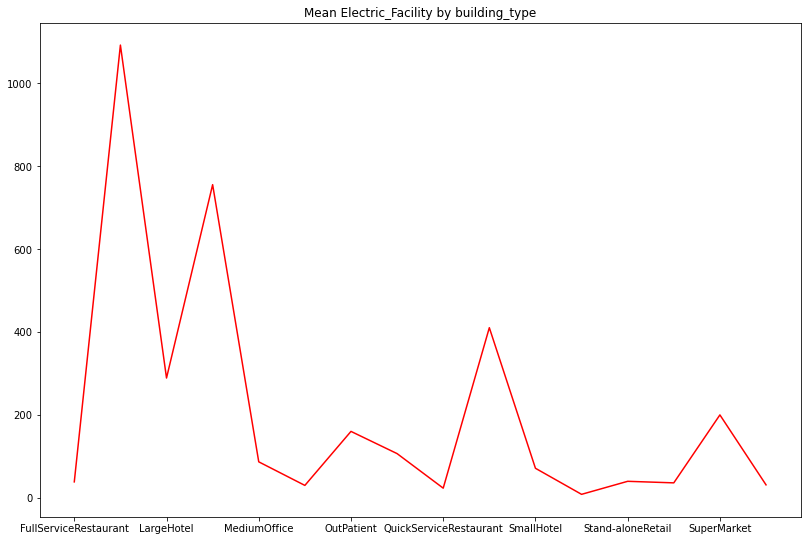

In [13]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by building_type')


Text(0.5, 1.0, 'Mean Gas_Facility by building_type')

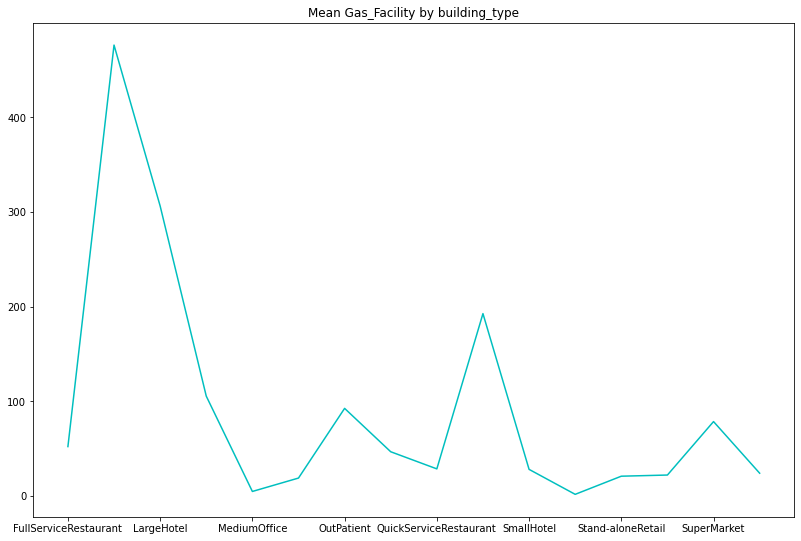

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by building_type')

In [15]:
profiles_df[['dayt', 'time']] = profiles_df['Date/Time'].str.split('  ', expand=True)
profiles_df[['month', 'day']] = profiles_df['dayt'].str.split('/', expand=True)
profiles_df = profiles_df.drop(columns=['dayt'])

Text(0.5, 1.0, 'Mean Electric_Facility by month')

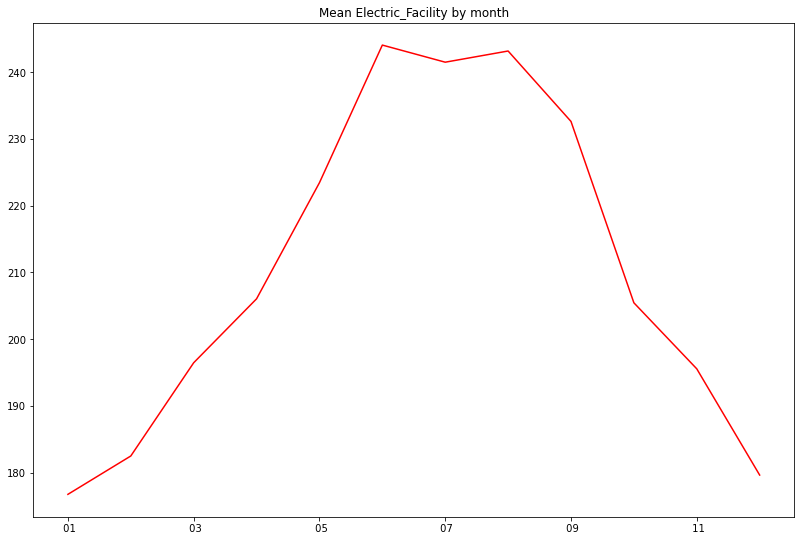

In [16]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('month').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by month')

the graph indicates that higest electricity consumption is between month May and August which implies 
 more electricity useage during summer

Text(0.5, 1.0, 'Mean Gas_Facility by month')

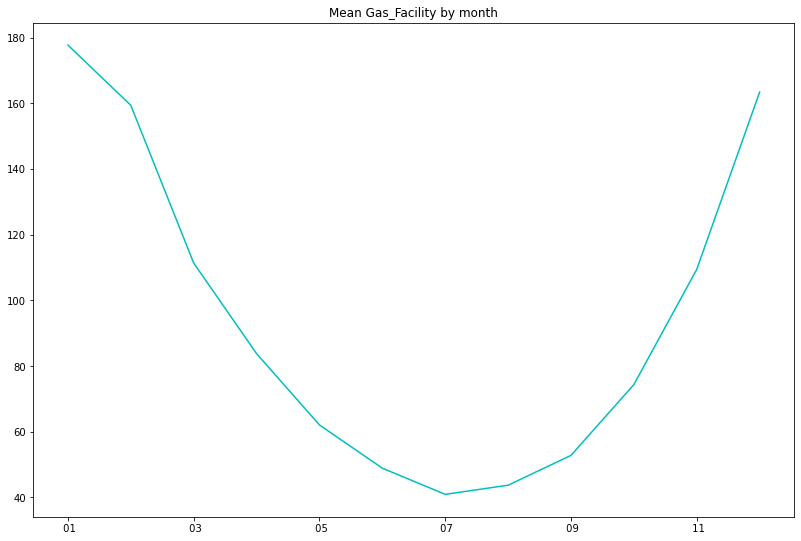

In [17]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('month').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by month')

While gas consumption is lower during summer 

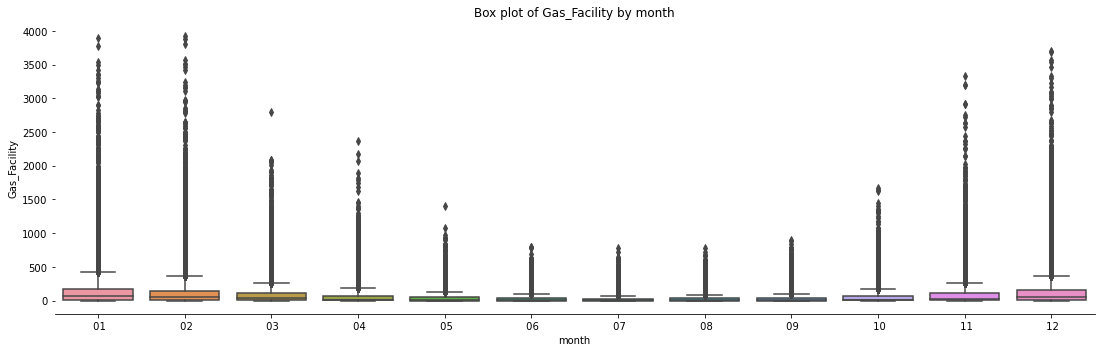

In [18]:
%matplotlib inline


#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='Gas_Facility', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of Gas_Facility by month')
sns.despine(left=True)
plt.tight_layout()

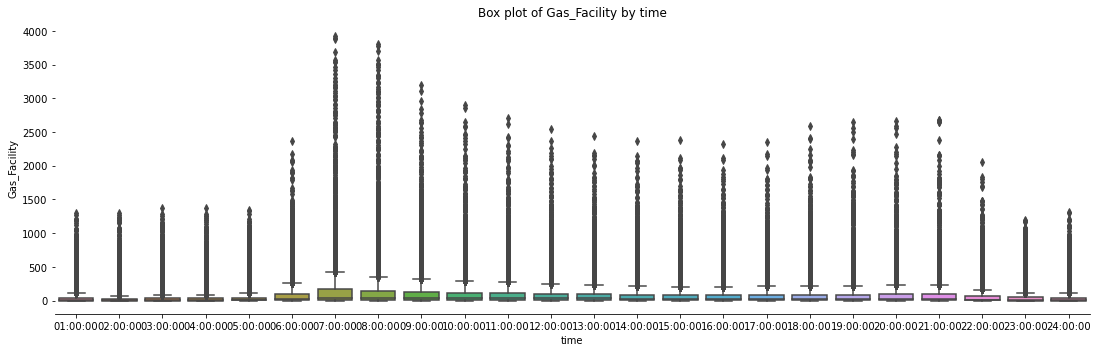

In [19]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Gas_Facility', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Gas_Facility by time')
sns.despine(left=True)
plt.tight_layout()

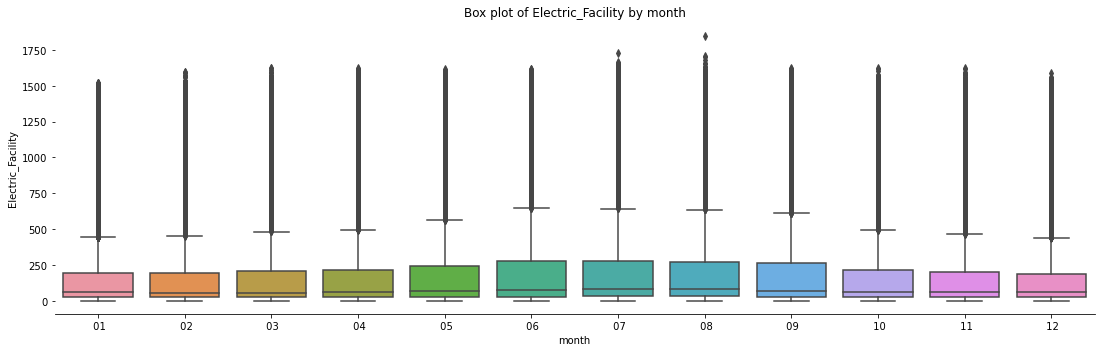

In [20]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='Electric_Facility', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of Electric_Facility by month')
sns.despine(left=True)
plt.tight_layout()

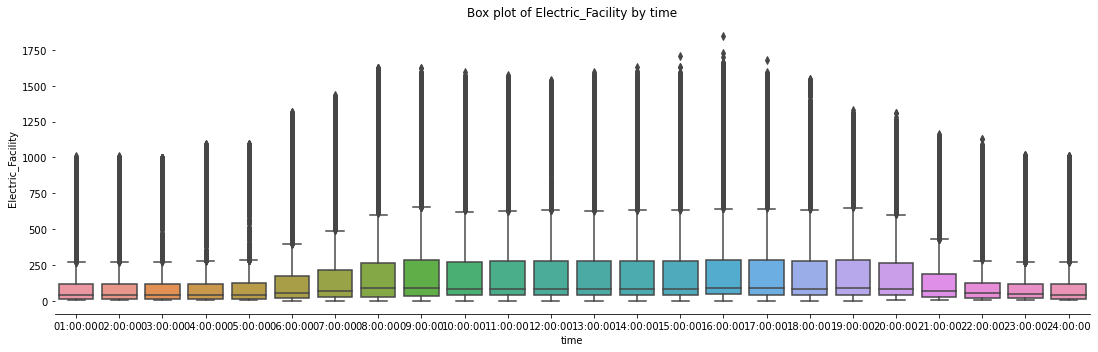

In [21]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Electric_Facility', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Electric_Facility by time')
sns.despine(left=True)
plt.tight_layout()

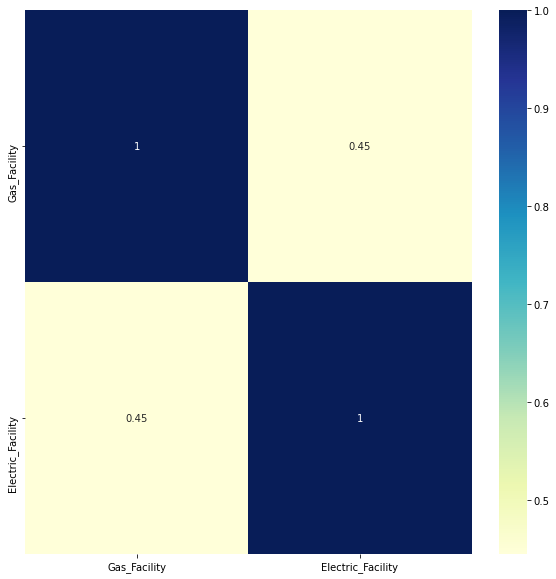

In [22]:
p = profiles_df[['Gas_Facility','Electric_Facility']]
corr_matrix = p.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

profiles_df['building_type']= LabelEncoder().fit_transform(profiles_df['building_type'].values) 

profiles_df['location']= LabelEncoder().fit_transform(profiles_df['location'].values) 

profiles_df

,Date/Time,Electric_Facility,Gas_Facility,building_type,location,time,month,day
0,01/01 01:00:00,22.545838,61.536209,0,0,01:00:00,01,01
1,01/01 02:00:00,14.745113,3.359880,0,0,02:00:00,01,01
2,01/01 03:00:00,14.760728,3.931953,0,0,03:00:00,01,01
3,01/01 04:00:00,14.766270,3.359880,0,0,04:00:00,01,01
4,01/01 05:00:00,14.918930,3.931959,0,0,05:00:00,01,01
...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,60.633698,15,1,20:00:00,12,31
8756,12/31 21:00:00,19.655896,82.036381,15,1,21:00:00,12,31
8757,12/31 22:00:00,19.063661,70.727347,15,1,22:00:00,12,31
8758,12/31 23:00:00,20.442228,98.965980,15,1,23:00:00,12,31


In [44]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Extract the target and Features from the DataFrame
X = profiles_df[['time','month','day','location']]
y = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility']


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [45]:
from sklearn.ensemble import RandomForestRegressor

#Create a Rainforest Refressor
clf=RandomForestRegressor(random_state=1, max_depth=15, n_estimators=200, n_jobs=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

ValueError: could not convert string to float: '12:00:00'

In [26]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.8207752537292932
